In [1]:
import tensorflow as tf
import numpy as np

In [2]:
tf.__version__

'2.3.1'

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)


In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
def get_fully_connected_network(kernel_weights='zeros', intralayer_activation='sigmoid'):
    inputs = tf.keras.Input(shape=(28,28), name="digits")
    flatten = tf.keras.layers.Flatten()(inputs)
    x1 = tf.keras.layers.Dense(100,kernel_initializer=kernel_weights, activation=intralayer_activation)(flatten)
    outputs  = tf.keras.layers.Dense(10,kernel_initializer=kernel_weights, activation="softmax")(x1)
    model_fullyconnect = tf.keras.Model(inputs, outputs)
    return model_fullyconnect

In [8]:
model_fullyconnect = get_fully_connected_network() #works when weights are initialized as zeros in case of fullyconnected

In [9]:
model_fullyconnect.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 100) dtype=float32, numpy=
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(100,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(100, 10) dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       

In [10]:
model_fullyconnect.compile(optimizer="SGD", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"] )

In [11]:
model_fullyconnect.fit(x_train, y_train, 64,validation_split=0.1, epochs=60)

Epoch 1/60
844/844 [==============================] - 1s 976us/step - loss: 2.0643 - accuracy: 0.2067 - val_loss: 2.0469 - val_accuracy: 0.2103
Epoch 2/60
844/844 [==============================] - 1s 943us/step - loss: 2.0247 - accuracy: 0.2099 - val_loss: 2.0277 - val_accuracy: 0.2138
Epoch 3/60
844/844 [==============================] - 1s 813us/step - loss: 2.0119 - accuracy: 0.2114 - val_loss: 2.0249 - val_accuracy: 0.2152
Epoch 4/60
844/844 [==============================] - 1s 840us/step - loss: 2.0044 - accuracy: 0.2119 - val_loss: 2.0145 - val_accuracy: 0.2130
Epoch 5/60
844/844 [==============================] - 1s 855us/step - loss: 1.9992 - accuracy: 0.2124 - val_loss: 2.0113 - val_accuracy: 0.2135
Epoch 6/60
844/844 [==============================] - 1s 864us/step - loss: 1.9210 - accuracy: 0.2550 - val_loss: 1.7833 - val_accuracy: 0.2975
Epoch 7/60
844/844 [==============================] - 1s 976us/step - loss: 1.7541 - accuracy: 0.2932 - val_loss: 1.7157 - val_accuracy:

844/844 [==============================] - 1s 919us/step - loss: 0.7711 - accuracy: 0.7544 - val_loss: 0.7156 - val_accuracy: 0.7710
Epoch 58/60
844/844 [==============================] - 1s 845us/step - loss: 0.7719 - accuracy: 0.7532 - val_loss: 0.7572 - val_accuracy: 0.7530
Epoch 59/60
844/844 [==============================] - 1s 861us/step - loss: 0.7663 - accuracy: 0.7517 - val_loss: 0.7094 - val_accuracy: 0.7758
Epoch 60/60
844/844 [==============================] - 1s 946us/step - loss: 0.7578 - accuracy: 0.7581 - val_loss: 0.7071 - val_accuracy: 0.7742


In [12]:
model_fullyconnect.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
%matplotlib inline  
import matplotlib.pyplot as plt

In [41]:
def plot_val_train_accuracy(model):
    accuracy = model.history.history['accuracy']
    val_accuracy = model.history.history['val_accuracy']
    plt.plot(model.history.epoch, accuracy )
    plt.plot(model.history.epoch, val_accuracy)
    
def plot_val_train_loss(model):
    loss = model.history.history['loss']
    val_loss = model.history.history['val_loss']
    plt.plot(model.history.epoch, loss)
    plt.plot(model.history.epoch,val_loss)

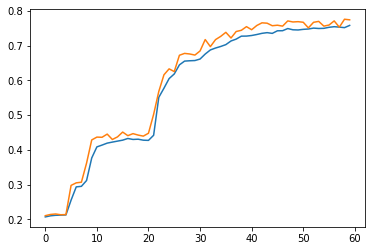

In [42]:
plot_val_train_accuracy(model_fullyconnect)

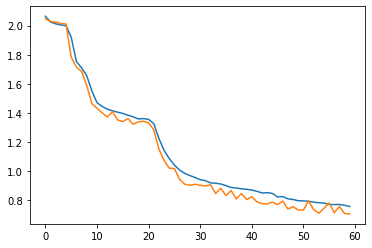

In [43]:
plot_val_train_loss(model_fullyconnect)

In [44]:
def get_conv_fullyconnected_model(kernel_weights='zeros', intralayer_activation='sigmoid'):
    inputs = tf.keras.Input(shape=(28,28,1), name="digits")
    conv1 = tf.keras.layers.Conv2D(20, kernel_size=5, kernel_initializer=kernel_weights)(inputs)
    pool1 = tf.keras.layers.MaxPool2D(2,2)(conv1)
    flatten = tf.keras.layers.Flatten()(pool1)
    x1 = tf.keras.layers.Dense(100, kernel_initializer=kernel_weights, activation=intralayer_activation)(flatten)
    outputs  = tf.keras.layers.Dense(10, kernel_initializer=kernel_weights, activation="softmax")(x1)
    model_conv = tf.keras.Model(inputs, outputs)
    return model_conv

In [45]:
model_conv_fullyconnected = get_conv_fullyconnected_model()

In [46]:
model_conv_fullyconnected.compile(optimizer="SGD", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"] )

In [47]:
model_conv_fullyconnected.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2880)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               288100    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 289,630
Trainable params: 289,630
Non-trainable params: 0
________________________________________________

In [49]:
model_conv_fullyconnected.fit(x_train, y_train, 64,validation_split=0.1, epochs=60)

Epoch 1/60
844/844 [==============================] - 1s 1ms/step - loss: 2.3021 - accuracy: 0.1117 - val_loss: 2.3031 - val_accuracy: 0.0978
Epoch 2/60
844/844 [==============================] - 1s 983us/step - loss: 2.3022 - accuracy: 0.1116 - val_loss: 2.3028 - val_accuracy: 0.1050
Epoch 3/60
844/844 [==============================] - 1s 968us/step - loss: 2.3021 - accuracy: 0.1121 - val_loss: 2.3028 - val_accuracy: 0.1050
Epoch 4/60
844/844 [==============================] - 1s 965us/step - loss: 2.3019 - accuracy: 0.1107 - val_loss: 2.3022 - val_accuracy: 0.1050
Epoch 5/60
844/844 [==============================] - 1s 988us/step - loss: 2.3022 - accuracy: 0.1117 - val_loss: 2.3021 - val_accuracy: 0.1050
Epoch 6/60
844/844 [==============================] - 1s 957us/step - loss: 2.3020 - accuracy: 0.1124 - val_loss: 2.3043 - val_accuracy: 0.1050
Epoch 7/60
844/844 [==============================] - 1s 998us/step - loss: 2.3021 - accuracy: 0.1128 - val_loss: 2.3014 - val_accuracy: 0

Epoch 58/60
844/844 [==============================] - 1s 1ms/step - loss: 2.3021 - accuracy: 0.1106 - val_loss: 2.3034 - val_accuracy: 0.1050
Epoch 59/60
844/844 [==============================] - 1s 1ms/step - loss: 2.3022 - accuracy: 0.1114 - val_loss: 2.3023 - val_accuracy: 0.1050
Epoch 60/60
844/844 [==============================] - 1s 1ms/step - loss: 2.3020 - accuracy: 0.1116 - val_loss: 2.3027 - val_accuracy: 0.1050


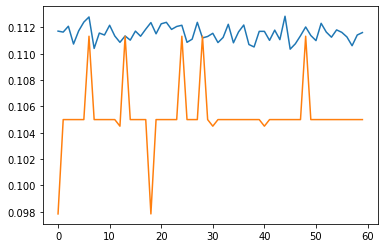

In [50]:
plot_val_train_accuracy(model_conv_fullyconnected)

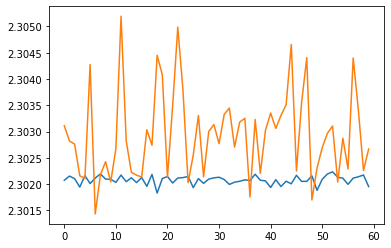

In [51]:
plot_val_train_loss(model_conv_fullyconnected)

In [52]:
model_conv_fullyconnected.weights

[<tf.Variable 'conv2d_3/kernel:0' shape=(5, 5, 1, 20) dtype=float32, numpy=
 array([[[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]]],
 
 
        [[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
  

In [74]:
from tensorflow.keras.layers import Reshape

In [ ]:
# x_train = np.reshape(x_train,[-1,28,28,1])

In [80]:
def get_fully_convolutional_model(kernel_weights='zeros', intralayer_activation='sigmoid'):
    inputs = tf.keras.Input(shape=(28,28,1), name="digits")
    conv1 = tf.keras.layers.Conv2D(20, kernel_size=5,activation=intralayer_activation, kernel_initializer=kernel_weights )(inputs)
    pool1 = tf.keras.layers.MaxPool2D(2,2)(conv1)
    conv2 = tf.keras.layers.Conv2D(40, kernel_size=3, activation=intralayer_activation, kernel_initializer=kernel_weights)(pool1)
    pool2 = tf.keras.layers.MaxPool2D(2,2)(conv2)
    # conv3 = tf.keras.layers.Conv2D(20, kernel_size=3, activation="sigmoid")(pool2)
    # pool3 = tf.keras.layers.MaxPool2D(2,2)(conv3)

    conv4 = tf.keras.layers.Conv2D(20, kernel_size=3, activation=intralayer_activation, kernel_initializer=kernel_weights)(pool2)
    conv5 = tf.keras.layers.Conv2D(10, kernel_size=3, activation=intralayer_activation, kernel_initializer=kernel_weights)(conv4)
    softmax = tf.keras.layers.Softmax()(conv5),
    reshaped_softmax = Reshape(target_shape=(10,1))(softmax),
    model_fullyconv = tf.keras.Model(inputs, softmax)
    return model_fullyconv
model_fullyconv = get_fully_convolutional_model()
model_fullyconv.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"] )

In [81]:
tf.keras.layers.Reshape([10])

In [82]:
model_fullyconv.summary()

Model: "functional_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 10, 10, 40)        7240      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 5, 5, 40)          0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 3, 3, 20)          7220      
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 1, 1, 10)        

In [60]:
model_fullyconv.fit(x_train, y_train, 64,validation_split=0.1, epochs=60)

Epoch 1/60
844/844 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1125 - val_loss: 2.3018 - val_accuracy: 0.1050
Epoch 2/60
844/844 [==============================] - 1s 1ms/step - loss: 2.3013 - accuracy: 0.1132 - val_loss: 2.3018 - val_accuracy: 0.1050
Epoch 3/60
844/844 [==============================] - 1s 1ms/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3021 - val_accuracy: 0.1050
Epoch 4/60
844/844 [==============================] - 1s 1ms/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3022 - val_accuracy: 0.1050
Epoch 5/60
844/844 [==============================] - 2s 2ms/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3021 - val_accuracy: 0.1050
Epoch 6/60
844/844 [==============================] - 2s 2ms/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3021 - val_accuracy: 0.1050
Epoch 7/60
844/844 [==============================] - 1s 1ms/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3022 - val_accuracy: 0.1050
Epoch 

844/844 [==============================] - 1s 1ms/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3021 - val_accuracy: 0.1050
Epoch 59/60
844/844 [==============================] - 1s 2ms/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3019 - val_accuracy: 0.1050
Epoch 60/60
844/844 [==============================] - 1s 1ms/step - loss: 2.3012 - accuracy: 0.1132 - val_loss: 2.3018 - val_accuracy: 0.1050


In [61]:
model_fullyconv.weights

[<tf.Variable 'conv2d_12/kernel:0' shape=(5, 5, 1, 20) dtype=float32, numpy=
 array([[[[3.3511934e-04, 3.3511885e-04, 3.3511946e-04, 3.3512016e-04,
           3.3511975e-04, 3.3511969e-04, 3.3511940e-04, 3.3511981e-04,
           3.3511917e-04, 3.3511981e-04, 3.3511847e-04, 3.3511961e-04,
           3.3511891e-04, 3.3512042e-04, 3.3511926e-04, 3.3511969e-04,
           3.3511844e-04, 3.3511940e-04, 3.3511975e-04, 3.3512013e-04]],
 
         [[2.3118769e-04, 2.3118875e-04, 2.3118901e-04, 2.3118964e-04,
           2.3118990e-04, 2.3118862e-04, 2.3118847e-04, 2.3118837e-04,
           2.3118885e-04, 2.3118855e-04, 2.3118831e-04, 2.3118930e-04,
           2.3118919e-04, 2.3118834e-04, 2.3118890e-04, 2.3118843e-04,
           2.3118756e-04, 2.3118939e-04, 2.3118834e-04, 2.3118821e-04]],
 
         [[1.2697042e-04, 1.2697013e-04, 1.2697111e-04, 1.2697055e-04,
           1.2697070e-04, 1.2697054e-04, 1.2697055e-04, 1.2697035e-04,
           1.2697060e-04, 1.2697009e-04, 1.2697045e-04, 1.26970

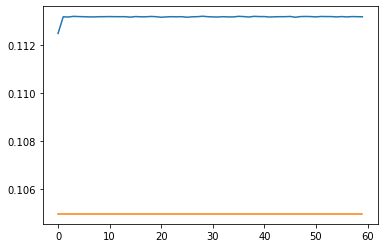

In [62]:
plot_val_train_accuracy(model_fullyconv)

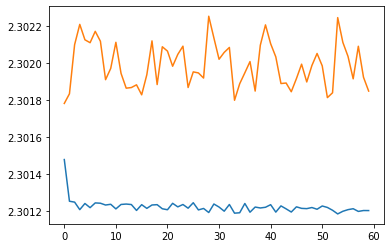

In [63]:
plot_val_train_loss(model_fullyconv)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, InputLayer, Reshape


model = tf.keras.models.Sequential([
    InputLayer([28,28,1]),
    Conv2D(filters=16, kernel_size=3, activation='sigmoid', kernel_initializer=tf.keras.initializers.Zeros()),
    Conv2D(filters=16, kernel_size=3, activation='sigmoid', kernel_initializer=tf.keras.initializers.Zeros()),
    MaxPool2D(pool_size=2),
    Conv2D(filters=24, kernel_size=3, activation='sigmoid', kernel_initializer=tf.keras.initializers.Zeros()),
    Conv2D(filters=24, kernel_size=3, activation='sigmoid', kernel_initializer=tf.keras.initializers.Zeros()),
    MaxPool2D(pool_size=2),
    Conv2D(filters=32, kernel_size=4, activation='sigmoid', kernel_initializer=tf.keras.initializers.Zeros()),
    Conv2D(filters=10, kernel_size=1, activation=None, kernel_initializer=tf.keras.initializers.Zeros()),
    tf.keras.layers.Softmax(),
    Reshape([10])
    ])

model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [ ]:
model.weights

In [ ]:
model.fit(x_train, y_train, 64,validation_split=0.1, epochs=60)

In [ ]:
model.weights